<h2> Random Forest </h2>
<h5> En muestreos con video remoto para estudiar peces marinos, se utilizaron modelos de Random Forest para evaluar la influencia de distintas variables abióticas sobre la riqueza taxonómica y abundancia total por sesión de muestreo. Random Forest permite estimar la importancia relativa de cada variable predictora (Géron, 2022). Se obtuvo un modelo de Random Forest para cada variable respuesta ('Riqueza' y 'Abundancia'), utilizando las función ‘RandomForestRegressor’ (con número de árboles de decisión= 500) de la librería Scikit-Learn de Python, tomando como variables explicativas: 'Sitio', 'Latitud', Hábitat', 'Composición abiótica', 'Tipo de sustrato', 'Sustrato descubierto', 'Profundidad', 'Temperatura', y 'Visibilidad'. 
Previamente se intentó clasificar y predecir a que 'Hábitat' pertenecía cada muestra usando la función 'RandomForestClassifier '</h5>
<h5> In remote video sampling to study marine fish, Random Forest models were used to evaluate the relative importance of different abiotic variables on taxonomic richness and total abundance per sampling session. A Random Forest model was obtained for each response variable ('Richness' and 'Abundance'), using the 'RandomForestRegressor' function (n = 500) from the Scikit-Learn Python library, taking as explanatory variables : 'Sitio', 'Latitud', Hábitat', 'Composición abiótica', 'Tipo de sustrato', 'Sustrato descubierto', 'Profundidad', 'Temperatura', y 'Visibilidad'. Previously an attempt was made to classify and predict the true 'HABITAT' of each instance using the 'RandomForestClassifier' function.</h5>

In [169]:
#import libraries:
import pandas as pd
import numpy as np
import matplotlib as mpl
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [170]:
#load dataset:
df = pd.read_csv('Analisis_BRUVS_utf8.csv', parse_dates=['Fecha'])
df.head()

,Fecha,Status,Camera,Goal,Art_light,Nivel_pesca,Dist_to_reef,Location,Sitio,Backup,...,MaxN_time_Robalo,MaxN_time_Trilla,MaxN_time_Sapo,MaxN_time_Cottoperca_trigloides,MaxN_time_Congiopodus,MaxN_time_palometa_moteada,MaxN_time_Anchoa_banco,MaxN_time_Paranot_magell,MaxN_time_Patagon_squamiceps,MaxN_time_Anchoita
0,2019-04-15,OK,GoPro,NaN,No,NaN,NaN,GN,GN_Bañuls,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-15,OK,GoPro,NaN,No,NaN,NaN,GN,GN_Bañuls,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-04-15,OK,GoPro,NaN,No,NaN,NaN,GN,GN_Bañuls,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-05-03,OK,GoPro,NaN,No,NaN,NaN,GN,GN_EMA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-03,BRUVs_caida,GoPro,NaN,NaN,NaN,NaN,GN,GN_EMAAlbatros,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
data= df.loc[:,'Fecha':'MaxN_Patagon_squamiceps'] #MaxN_Patagon_squamiceps es la última columna con datos de abundancia (MaxN)
data.shape

(463, 78)

In [172]:
#get a subset of shallow samples (depth <=30meters)
data_somero = data[data.Profun_m <= 30]
data_somero_noMDQ = data[(data.Profun_m <= 30) & (data.Location != "Mar del Plata")] #also remove one Location
data_somero_noMDQ = data_somero_noMDQ.dropna(subset=['Temperatura'])  #INTERNAL CODE: REMOVE FAILED SURVEYS

data_somero.shape, data_somero_noMDQ.shape

((329, 78), (320, 78))

#### **RandomForestClassifier**:

In [174]:
columns_included= ['Location', 'lon', 'lat','Habitat', 'Corriente', 'Composicion_abiotica1', 'Substrate_consolidation', 'Bare bottom','Profun_m', 'Temperatura','Visibilidad', 
                   'Riqueza_MaxN', 'T1st_mean_d', 'MaxN_suma', 'MaxN_Salmon','MaxN_Turco','MaxN_Mero', 'MaxN_Papamoscas','MaxN_Escrofalo', 'MaxN_Besugo',
                   'MaxN_gallo', 'MaxN_O_smitti',  'MaxN_Savorin', 'MaxN_Magru', 'MaxN_Chucho', 'MaxN_Cazon','MaxN_Cocherito', 'MaxN_palo', 'MaxN_sargo', 'MaxN_limon',
                   'MaxN_Gatopardo', 'MaxN_Bagre', 'MaxN_Clinido','MaxN_Patagonotothen_sp', 'MaxN_Paralichthys_Patagonicus', 'MaxN_merl_hubbsi', 'MaxN_acorazadito', 
                   'MaxN_Gatuzo', 'MaxN_diablillo','MaxN_surel','MaxN_squalus', 'MaxN_Myxinidae', 'MaxN_Robalo','MaxN_Trilla', 'MaxN_Sapo', 'MaxN_Cottoperca_trigloides',
                   'MaxN_Congiopodus', 'MaxN_palometa_moteada', 'MaxN_Anchoa_banco','MaxN_Paranot_magell', 'MaxN_Patagon_squamiceps']

In [175]:
df_models = data_somero_noMDQ[columns_included] #include only columns with spp abundances and target abiotic vairaibles
df_models.shape

(320, 51)

In [176]:
df_models.loc[:,'MaxN_Salmon':'MaxN_Patagon_squamiceps']

,MaxN_Salmon,MaxN_Turco,MaxN_Mero,MaxN_Papamoscas,MaxN_Escrofalo,MaxN_Besugo,MaxN_gallo,MaxN_O_smitti,MaxN_Savorin,MaxN_Magru,...,MaxN_Myxinidae,MaxN_Robalo,MaxN_Trilla,MaxN_Sapo,MaxN_Cottoperca_trigloides,MaxN_Congiopodus,MaxN_palometa_moteada,MaxN_Anchoa_banco,MaxN_Paranot_magell,MaxN_Patagon_squamiceps
0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,10.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,3.0,18.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
461,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
df_models_transformed= df_models.loc[:,'MaxN_Salmon':'MaxN_Patagon_squamiceps']
df_models_transformed  #only columns with species abundances

,MaxN_Salmon,MaxN_Turco,MaxN_Mero,MaxN_Papamoscas,MaxN_Escrofalo,MaxN_Besugo,MaxN_gallo,MaxN_O_smitti,MaxN_Savorin,MaxN_Magru,...,MaxN_Myxinidae,MaxN_Robalo,MaxN_Trilla,MaxN_Sapo,MaxN_Cottoperca_trigloides,MaxN_Congiopodus,MaxN_palometa_moteada,MaxN_Anchoa_banco,MaxN_Paranot_magell,MaxN_Patagon_squamiceps
0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,10.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,3.0,18.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
461,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
# apply a logarithmic transofrmation to reduce the importance of highly abundant species
for column in df_models_transformed:
    df_models_transformed[column]= df_models_transformed[column].apply(lambda x: round((np.log10(x)) + 1,1) if x > 0 else x)
    
df_models_transformed

,MaxN_Salmon,MaxN_Turco,MaxN_Mero,MaxN_Papamoscas,MaxN_Escrofalo,MaxN_Besugo,MaxN_gallo,MaxN_O_smitti,MaxN_Savorin,MaxN_Magru,...,MaxN_Myxinidae,MaxN_Robalo,MaxN_Trilla,MaxN_Sapo,MaxN_Cottoperca_trigloides,MaxN_Congiopodus,MaxN_palometa_moteada,MaxN_Anchoa_banco,MaxN_Paranot_magell,MaxN_Patagon_squamiceps
0,1.6,1.7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,0.0,2.2,0.0,0.0,0.0,0.0,0.0,2.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.6,1.5,2.3,0.0,1.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.0,1.0,0.0,0.0,0.0,2.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
461,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
#change the abundances for the log abundances
for column in df_models.loc[:,'MaxN_Salmon':'MaxN_Patagon_squamiceps']:
    df_models[column] = df_models_transformed[column]
    
df_models

C:\Users\merlo\AppData\Local\Temp\ipykernel_20252\3807517972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models[column] = df_models_transformed[column]


,Location,lon,lat,Habitat,Corriente,Composicion_abiotica1,Substrate_consolidation,Bare bottom,Profun_m,Temperatura,...,MaxN_Myxinidae,MaxN_Robalo,MaxN_Trilla,MaxN_Sapo,MaxN_Cottoperca_trigloides,MaxN_Congiopodus,MaxN_palometa_moteada,MaxN_Anchoa_banco,MaxN_Paranot_magell,MaxN_Patagon_squamiceps
0,GN,-64.751984,-42.635274,Transition,NaN,Canto_rod,Consolidated,55.0,23.0,16.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GN,-64.751985,-42.635277,SB,NaN,Canto_rod,Consolidated,45.0,17.0,16.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GN,-64.751986,-42.635278,Transition,NaN,Canto_rod,Consolidated,80.0,28.8,16.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GN,-65.021438,-42.765700,Artificial_reef,NaN,limo,Consolidated,90.0,12.7,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,GN,-65.001474,-42.773008,Transition,NaN,limo,Unconsolidated,85.0,21.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,GSM,-65.046880,-41.922320,Transition,Media-baja,Canto_rod,Consolidated,85.0,15.0,11.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456,GSM,-65.035390,-41.918630,Transition,Media-baja,Canto_rod,Consolidated,86.0,20.0,11.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457,GSM,-65.014300,-41.917390,Transition,Baja,Roca,Consolidated,96.0,30.0,11.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
461,GSM,-65.014000,-41.860790,SB,Baja,limo,Unconsolidated,100.0,30.0,11.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
df_models.Location.unique() #check unique Locations

array(['GN', 'GSM', 'GSJ', 'CR', 'Camar', 'Comod_Riv', 'Isla_E',
       'Pto_des'], dtype=object)

In [181]:
df_models['Habitat'] = df_models['Habitat'].replace('Artificial_reef', 'Reef') #name artificial_reefs as reefs

C:\Users\merlo\AppData\Local\Temp\ipykernel_20252\2332028970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models['Habitat'] = df_models['Habitat'].replace('Artificial_reef', 'Reef')


##### split data:

In [182]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_models, test_size=0.2, stratify=df_models["Location"], random_state=42)

In [183]:
X_train = train_set.drop(['Habitat'], axis=1)
y_train = train_set['Habitat'].copy()

X_test = test_set.drop(['Habitat'], axis=1)
y_test = test_set['Habitat'].copy()

In [184]:
variables_categoricas = ['Location', 'Corriente', 'Composicion_abiotica1','Substrate_consolidation', 'Visibilidad']
X_train_cat = X_train[variables_categoricas]
X_train_cat 

,Location,Corriente,Composicion_abiotica1,Substrate_consolidation,Visibilidad
290,GSM,NaN,arena,Unconsolidated,Media-alta
128,GN,Baja,Tosca,Consolidated,Media-alta
24,GN,NaN,Tosca,Consolidated,Alta
303,GSM,NaN,arena,Unconsolidated,Media
134,GSJ,Baja,indet,Consolidated,Alta
...,...,...,...,...,...
294,GSM,NaN,arena,Unconsolidated,Media
178,GSM,NaN,Canto_rod,Consolidated,Media
436,GSM,Baja,Roca,Consolidated,Alta
126,GN,Baja,limo,Unconsolidated,Media-baja


#### Encoding categorical variables:

In [185]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)
df_cat_encoded

array([[ 5., nan,  4.,  2.,  4.],
       [ 3.,  1.,  3.,  0.,  4.],
       [ 3., nan,  3.,  0.,  0.],
       ...,
       [ 5.,  1.,  2.,  0.,  0.],
       [ 3.,  1.,  7.,  2.,  5.],
       [ 1., nan,  4.,  0.,  3.]])

In [186]:
X_train[variables_categoricas] = df_cat_encoded
X_train

,Location,lon,lat,Corriente,Composicion_abiotica1,Substrate_consolidation,Bare bottom,Profun_m,Temperatura,Visibilidad,...,MaxN_Myxinidae,MaxN_Robalo,MaxN_Trilla,MaxN_Sapo,MaxN_Cottoperca_trigloides,MaxN_Congiopodus,MaxN_palometa_moteada,MaxN_Anchoa_banco,MaxN_Paranot_magell,MaxN_Patagon_squamiceps
290,5.0,-65.021968,-40.822369,NaN,4.0,2.0,100.0,13.0,14.7,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,3.0,-64.288250,-42.587563,1.0,3.0,0.0,100.0,16.0,16.2,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,3.0,-64.283940,-42.619492,NaN,3.0,0.0,50.0,18.0,17.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,5.0,-65.073666,-40.841541,NaN,4.0,2.0,100.0,12.2,14.5,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,4.0,-64.115709,-42.395431,1.0,6.0,0.0,0.0,12.0,20.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,5.0,-65.046305,-40.804284,NaN,4.0,2.0,100.0,9.0,14.7,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,5.0,-65.007709,-42.092733,NaN,0.0,0.0,2.0,19.5,17.6,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,5.0,-64.991882,-41.707980,1.0,2.0,0.0,95.0,26.3,15.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,3.0,-64.293608,-42.590598,1.0,7.0,2.0,95.0,30.0,15.7,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
X_test_cat = X_test[variables_categoricas]
df_cat_encoded_test = ordinal_encoder.fit_transform(X_test_cat)
X_test[variables_categoricas] = df_cat_encoded_test
X_test

,Location,lon,lat,Corriente,Composicion_abiotica1,Substrate_consolidation,Bare bottom,Profun_m,Temperatura,Visibilidad,...,MaxN_Myxinidae,MaxN_Robalo,MaxN_Trilla,MaxN_Sapo,MaxN_Cottoperca_trigloides,MaxN_Congiopodus,MaxN_palometa_moteada,MaxN_Anchoa_banco,MaxN_Paranot_magell,MaxN_Patagon_squamiceps
8,3.0,-65.003285,-42.772771,NaN,5.0,0.0,98.0,14.0,15.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447,7.0,-65.819569,-47.902125,4.0,5.0,1.0,99.0,20.0,7.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,3.0,-64.259970,-42.682020,2.0,5.0,1.0,100.0,17.0,15.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,5.0,-65.009932,-41.697267,1.0,1.0,0.0,99.0,12.0,15.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,1.0,-65.581184,-44.961309,NaN,1.0,0.0,30.0,15.0,15.6,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,6.0,-64.416667,-54.766667,7.0,5.0,1.0,99.0,8.0,6.1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,3.0,-64.255739,-42.625804,NaN,5.0,1.0,99.0,15.5,17.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,-65.021438,-42.765700,NaN,5.0,0.0,90.0,12.7,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354,3.0,-64.257255,-42.623581,1.0,1.0,0.0,8.0,14.0,16.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
X_train.columns

Index(['Location', 'lon', 'lat', 'Corriente', 'Composicion_abiotica1',
       'Substrate_consolidation', 'Bare bottom', 'Profun_m', 'Temperatura',
       'Visibilidad', 'Riqueza_MaxN', 'T1st_mean_d', 'MaxN_suma',
       'MaxN_Salmon', 'MaxN_Turco', 'MaxN_Mero', 'MaxN_Papamoscas',
       'MaxN_Escrofalo', 'MaxN_Besugo', 'MaxN_gallo', 'MaxN_O_smitti',
       'MaxN_Savorin', 'MaxN_Magru', 'MaxN_Chucho', 'MaxN_Cazon',
       'MaxN_Cocherito', 'MaxN_palo', 'MaxN_sargo', 'MaxN_limon',
       'MaxN_Gatopardo', 'MaxN_Bagre', 'MaxN_Clinido',
       'MaxN_Patagonotothen_sp', 'MaxN_Paralichthys_Patagonicus',
       'MaxN_merl_hubbsi', 'MaxN_acorazadito', 'MaxN_Gatuzo', 'MaxN_diablillo',
       'MaxN_surel', 'MaxN_squalus', 'MaxN_Myxinidae', 'MaxN_Robalo',
       'MaxN_Trilla', 'MaxN_Sapo', 'MaxN_Cottoperca_trigloides',
       'MaxN_Congiopodus', 'MaxN_palometa_moteada', 'MaxN_Anchoa_banco',
       'MaxN_Paranot_magell', 'MaxN_Patagon_squamiceps'],
      dtype='object')

In [189]:
X_train.shape

(256, 50)

##### Null data (NaN):

In [190]:
X_train.isna().sum()

Location                           0
lon                                0
lat                                0
Corriente                        129
Composicion_abiotica1              3
Substrate_consolidation            0
Bare bottom                       16
Profun_m                           0
Temperatura                        0
Visibilidad                        7
Riqueza_MaxN                       0
T1st_mean_d                       15
MaxN_suma                          0
MaxN_Salmon                        0
MaxN_Turco                         0
MaxN_Mero                          0
MaxN_Papamoscas                    0
MaxN_Escrofalo                     0
MaxN_Besugo                        0
MaxN_gallo                         0
MaxN_O_smitti                      0
MaxN_Savorin                       0
MaxN_Magru                         0
MaxN_Chucho                        0
MaxN_Cazon                         0
MaxN_Cocherito                     0
MaxN_palo                          0
M

In [191]:
#drop this columns because 'corriente' has too much NaN, 'lat' & 'lon' are correlated to site
X_train= X_train.drop(['lat','lon','Corriente'], axis=1) 
X_test= X_test.drop(['lat','lon','Corriente'], axis=1)

In [192]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(X_train)

SimpleImputer(strategy='median')

In [ ]:
X= imputer.transform(X_train)
X_train = pd.DataFrame(X, columns=X_train.columns,index=X_train.index)
X_train, X_train.shape

In [194]:
X_t= imputer.transform(X_test)
X_test = pd.DataFrame(X_t, columns=X_test.columns,index=X_test.index)
X_test

,Location,Composicion_abiotica1,Substrate_consolidation,Bare bottom,Profun_m,Temperatura,Visibilidad,Riqueza_MaxN,T1st_mean_d,MaxN_suma,...,MaxN_Myxinidae,MaxN_Robalo,MaxN_Trilla,MaxN_Sapo,MaxN_Cottoperca_trigloides,MaxN_Congiopodus,MaxN_palometa_moteada,MaxN_Anchoa_banco,MaxN_Paranot_magell,MaxN_Patagon_squamiceps
8,3.0,5.0,0.0,98.0,14.0,15.0,3.0,4.0,24.850000,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447,7.0,5.0,1.0,99.0,20.0,7.0,3.0,1.0,4.133333,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,3.0,5.0,1.0,100.0,17.0,15.5,0.0,2.0,26.566667,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,5.0,1.0,0.0,99.0,12.0,15.5,0.0,4.0,24.083333,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,1.0,1.0,0.0,30.0,15.0,15.6,3.0,2.0,1.716667,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,6.0,5.0,1.0,99.0,8.0,6.1,1.0,1.0,29.150000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,3.0,5.0,1.0,99.0,15.5,17.0,2.0,0.0,12.016667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,5.0,0.0,90.0,12.7,15.0,0.0,4.0,4.883333,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354,3.0,1.0,0.0,8.0,14.0,16.3,0.0,5.0,0.950000,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Outliers:

In [195]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X_train) #veo que columnas tienen outliers

In [ ]:
outlier_pred #1 or 0 depending on if the isolation forest predicts outliers in the columns

In [197]:
#X_train = X_train[outlier_pred == 1]
#y_train = y_train.iloc[outlier_pred == 1]

In [198]:
X_train

,Location,Composicion_abiotica1,Substrate_consolidation,Bare bottom,Profun_m,Temperatura,Visibilidad,Riqueza_MaxN,T1st_mean_d,MaxN_suma,...,MaxN_Myxinidae,MaxN_Robalo,MaxN_Trilla,MaxN_Sapo,MaxN_Cottoperca_trigloides,MaxN_Congiopodus,MaxN_palometa_moteada,MaxN_Anchoa_banco,MaxN_Paranot_magell,MaxN_Patagon_squamiceps
290,5.0,4.0,2.0,100.0,13.0,14.7,4.0,5.0,39.833333,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,3.0,3.0,0.0,100.0,16.0,16.2,4.0,5.0,2.816667,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,3.0,3.0,0.0,50.0,18.0,17.3,0.0,6.0,2.683333,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,5.0,4.0,2.0,100.0,12.2,14.5,3.0,3.0,21.866667,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,4.0,6.0,0.0,0.0,12.0,20.1,0.0,5.0,0.983333,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,5.0,4.0,2.0,100.0,9.0,14.7,3.0,1.0,20.533333,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,5.0,0.0,0.0,2.0,19.5,17.6,3.0,3.0,2.833333,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,5.0,2.0,0.0,95.0,26.3,15.5,0.0,5.0,20.516667,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,3.0,7.0,2.0,95.0,30.0,15.7,5.0,4.0,8.466667,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
from sklearn.ensemble import RandomForestClassifier

#Have ALL HYPERPARAMETERS of DecisionTreeClassifier & of BaggingClassifier
rnd_clf_hab = RandomForestClassifier(n_estimators=500, max_leaf_nodes=12,n_jobs=-1, random_state=42)
rnd_clf_hab.fit(X_train, y_train)
y_pred_rf = rnd_clf_hab.predict(X_test)

In [200]:
X_train.shape

(256, 47)

In [201]:
#analyze feature importance for the model:

In [202]:
feat_importance= {}
for score, name in zip(rnd_clf_hab.feature_importances_, X_train.columns):
    feat_importance[name] = round(score, 2)

feat_importance

{'Location': 0.07,
 'Composicion_abiotica1': 0.03,
 'Substrate_consolidation': 0.05,
 'Bare bottom': 0.03,
 'Profun_m': 0.03,
 'Temperatura': 0.08,
 'Visibilidad': 0.01,
 'Riqueza_MaxN': 0.07,
 'T1st_mean_d': 0.04,
 'MaxN_suma': 0.04,
 'MaxN_Salmon': 0.06,
 'MaxN_Turco': 0.14,
 'MaxN_Mero': 0.09,
 'MaxN_Papamoscas': 0.02,
 'MaxN_Escrofalo': 0.09,
 'MaxN_Besugo': 0.02,
 'MaxN_gallo': 0.0,
 'MaxN_O_smitti': 0.0,
 'MaxN_Savorin': 0.0,
 'MaxN_Magru': 0.01,
 'MaxN_Chucho': 0.0,
 'MaxN_Cazon': 0.01,
 'MaxN_Cocherito': 0.01,
 'MaxN_palo': 0.02,
 'MaxN_sargo': 0.02,
 'MaxN_limon': 0.0,
 'MaxN_Gatopardo': 0.0,
 'MaxN_Bagre': 0.0,
 'MaxN_Clinido': 0.0,
 'MaxN_Patagonotothen_sp': 0.02,
 'MaxN_Paralichthys_Patagonicus': 0.0,
 'MaxN_merl_hubbsi': 0.0,
 'MaxN_acorazadito': 0.0,
 'MaxN_Gatuzo': 0.0,
 'MaxN_diablillo': 0.0,
 'MaxN_surel': 0.0,
 'MaxN_squalus': 0.0,
 'MaxN_Myxinidae': 0.0,
 'MaxN_Robalo': 0.0,
 'MaxN_Trilla': 0.0,
 'MaxN_Sapo': 0.0,
 'MaxN_Cottoperca_trigloides': 0.0,
 'MaxN_Congiopodu

In [203]:
sorted_feat_importance = sorted(feat_importance.items(), key=lambda x:x[1])
sorted_feat_importance

[('MaxN_gallo', 0.0),
 ('MaxN_O_smitti', 0.0),
 ('MaxN_Savorin', 0.0),
 ('MaxN_Chucho', 0.0),
 ('MaxN_limon', 0.0),
 ('MaxN_Gatopardo', 0.0),
 ('MaxN_Bagre', 0.0),
 ('MaxN_Clinido', 0.0),
 ('MaxN_Paralichthys_Patagonicus', 0.0),
 ('MaxN_merl_hubbsi', 0.0),
 ('MaxN_acorazadito', 0.0),
 ('MaxN_Gatuzo', 0.0),
 ('MaxN_diablillo', 0.0),
 ('MaxN_surel', 0.0),
 ('MaxN_squalus', 0.0),
 ('MaxN_Myxinidae', 0.0),
 ('MaxN_Robalo', 0.0),
 ('MaxN_Trilla', 0.0),
 ('MaxN_Sapo', 0.0),
 ('MaxN_Cottoperca_trigloides', 0.0),
 ('MaxN_Congiopodus', 0.0),
 ('MaxN_palometa_moteada', 0.0),
 ('MaxN_Anchoa_banco', 0.0),
 ('Visibilidad', 0.01),
 ('MaxN_Magru', 0.01),
 ('MaxN_Cazon', 0.01),
 ('MaxN_Cocherito', 0.01),
 ('MaxN_Patagon_squamiceps', 0.01),
 ('MaxN_Papamoscas', 0.02),
 ('MaxN_Besugo', 0.02),
 ('MaxN_palo', 0.02),
 ('MaxN_sargo', 0.02),
 ('MaxN_Patagonotothen_sp', 0.02),
 ('MaxN_Paranot_magell', 0.02),
 ('Composicion_abiotica1', 0.03),
 ('Bare bottom', 0.03),
 ('Profun_m', 0.03),
 ('T1st_mean_d', 0.04),

In [ ]:
y_test #'SB' level means soft-bottoms

In [205]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", round(accuracy_score(y_pred_rf, y_test), 3))

Accuracy:  0.672


In [206]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf, labels=rnd_clf_hab.classes_)
cm

array([[ 2,  0,  4,  0],
       [ 0, 10,  0,  9],
       [ 0,  0, 16,  4],
       [ 0,  4,  0, 15]], dtype=int64)

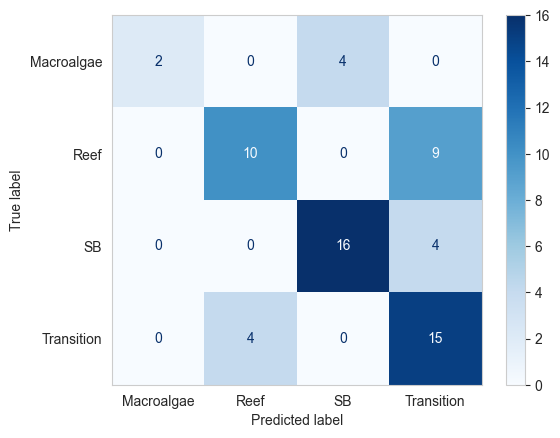

In [207]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rnd_clf_hab.classes_)
#disp.plot(include_values=True, cmap=plt.cm.Blues, grid=False)

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(include_values=True, cmap=plt.cm.Blues, ax=ax)
ax.grid(False)  # Turn off the grid

### REGRESSION MODEL with 'Riqueza'/ 'Abundancia' as response variables

In [208]:
columns_included= ['Location', 'lat','Habitat', 'Composicion_abiotica1', 'Substrate_consolidation', 'Bare bottom','Profun_m', 'Temperatura','Visibilidad', 
                   'Riqueza_MaxN']

df_models_reg = data_somero_noMDQ[columns_included]
df_models_reg.shape

(320, 10)

In [209]:
df_models_reg= df_models_reg[df_models_reg.Riqueza_MaxN.isna() == False]
df_models_reg.shape

(320, 10)

In [210]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_models_reg, test_size=0.2, random_state=42)

X_trainR = train_set.drop(['Riqueza_MaxN'], axis=1)
y_trainR = train_set['Riqueza_MaxN'].copy()

X_testR = test_set.drop(['Riqueza_MaxN'], axis=1)
y_testR = test_set['Riqueza_MaxN'].copy()

In [211]:
variables_categoricas = ['Location', 'Habitat', 'Composicion_abiotica1','Substrate_consolidation', 'Visibilidad']
X_train_cat = X_trainR[variables_categoricas]
X_train_cat 

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)
df_cat_encoded

X_trainR[variables_categoricas] = df_cat_encoded

X_test_cat = X_testR[variables_categoricas]
df_cat_encoded_test = ordinal_encoder.fit_transform(X_test_cat)
X_testR[variables_categoricas] = df_cat_encoded_test
X_testR

,Location,lat,Habitat,Composicion_abiotica1,Substrate_consolidation,Bare bottom,Profun_m,Temperatura,Visibilidad
291,5.0,-40.818183,4.0,3.0,0.0,70.0,12.5,14.7,3.0
364,5.0,-41.697426,4.0,2.0,1.0,50.0,12.0,11.5,4.0
33,3.0,-42.619721,4.0,2.0,0.0,8.0,16.5,17.0,0.0
94,3.0,-42.770650,4.0,3.0,0.0,8.0,17.0,17.1,0.0
13,5.0,-42.128872,2.0,0.0,0.0,45.0,18.0,15.3,0.0
...,...,...,...,...,...,...,...,...,...
188,0.0,-44.393669,2.0,0.0,0.0,97.0,16.0,15.2,2.0
344,2.0,-46.023632,3.0,3.0,1.0,99.0,19.0,14.0,3.0
238,1.0,-45.007771,3.0,3.0,1.0,100.0,15.0,14.5,3.0
448,7.0,-47.728458,1.0,0.0,0.0,45.0,18.0,7.0,3.0


In [212]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(X_trainR)

X= imputer.transform(X_trainR)
X_trainR = pd.DataFrame(X, columns=X_trainR.columns,index=X_trainR.index)

X_t= imputer.transform(X_testR)
X_testR = pd.DataFrame(X_t, columns=X_testR.columns,index=X_testR.index)
X_testR

,Location,lat,Habitat,Composicion_abiotica1,Substrate_consolidation,Bare bottom,Profun_m,Temperatura,Visibilidad
291,5.0,-40.818183,4.0,3.0,0.0,70.0,12.5,14.7,3.0
364,5.0,-41.697426,4.0,2.0,1.0,50.0,12.0,11.5,4.0
33,3.0,-42.619721,4.0,2.0,0.0,8.0,16.5,17.0,0.0
94,3.0,-42.770650,4.0,3.0,0.0,8.0,17.0,17.1,0.0
13,5.0,-42.128872,2.0,0.0,0.0,45.0,18.0,15.3,0.0
...,...,...,...,...,...,...,...,...,...
188,0.0,-44.393669,2.0,0.0,0.0,97.0,16.0,15.2,2.0
344,2.0,-46.023632,3.0,3.0,1.0,99.0,19.0,14.0,3.0
238,1.0,-45.007771,3.0,3.0,1.0,100.0,15.0,14.5,3.0
448,7.0,-47.728458,1.0,0.0,0.0,45.0,18.0,7.0,3.0


In [213]:
from sklearn.ensemble import RandomForestRegressor

#Have ALL HYPERPARAMETERS of DecisionTreeClassifier & of BaggingClassifier
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=12,n_jobs=-1, random_state=42)
rnd_reg.fit(X_trainR, y_trainR)
y_pred_reg = rnd_reg.predict(X_testR)

In [214]:
feat_importance= {}
for score, name in zip(rnd_reg.feature_importances_, X_trainR.columns):
    feat_importance[name] = round(score, 2)

feat_importance

{'Location': 0.05,
 'lat': 0.29,
 'Habitat': 0.32,
 'Composicion_abiotica1': 0.02,
 'Substrate_consolidation': 0.03,
 'Bare bottom': 0.04,
 'Profun_m': 0.09,
 'Temperatura': 0.12,
 'Visibilidad': 0.05}

In [215]:
# Sort the dictionary by values in descending order
feat_importance = {key: value for key, value in feat_importance.items() if value > 0.05}
sorted_feature = dict(sorted(feat_importance.items(), key=lambda item: item[1]))
sorted_feature

{'Profun_m': 0.09, 'Temperatura': 0.12, 'lat': 0.29, 'Habitat': 0.32}

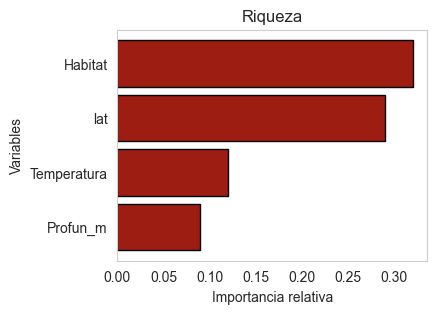

In [216]:
# Extracting keys and values
Variables = list(sorted_feature.keys())
Relative_imp = list(sorted_feature.values())

# Creating a horizontal bar plot
plt.figure(figsize=(4,3))
plt.barh(Variables,Relative_imp, height=0.85, color="#9D1D12", edgecolor="black")
plt.xlabel('Importancia relativa')
plt.ylabel('Variables')
plt.title('Riqueza')
plt.grid(False)

#plt.savefig('RF_riq.tiff', dpi=300, bbox_inches='tight', facecolor='white')

**Abundance**

In [217]:
columns_included_ab= ['Location', 'lat','Habitat', 'Composicion_abiotica1', 'Substrate_consolidation', 'Bare bottom','Profun_m', 'Temperatura','Visibilidad', 
                   'MaxN_suma']

df_models_reg_ab = data_somero_noMDQ[columns_included_ab]
df_models_reg_ab.shape

(320, 10)

In [218]:
df_models_reg_ab= df_models_reg_ab[df_models_reg_ab.MaxN_suma.isna() == False]
df_models_reg_ab.shape

(320, 10)

In [219]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_models_reg_ab, test_size=0.2, random_state=42)

X_trainR = train_set.drop(['MaxN_suma'], axis=1)
y_trainR = train_set['MaxN_suma'].copy()

X_testR = test_set.drop(['MaxN_suma'], axis=1)
y_testR = test_set['MaxN_suma'].copy()

In [220]:
variables_categoricas = ['Location', 'Habitat', 'Composicion_abiotica1','Substrate_consolidation', 'Visibilidad']
X_train_cat = X_trainR[variables_categoricas]
X_train_cat 

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)
df_cat_encoded

X_trainR[variables_categoricas] = df_cat_encoded

X_test_cat = X_testR[variables_categoricas]
df_cat_encoded_test = ordinal_encoder.fit_transform(X_test_cat)
X_testR[variables_categoricas] = df_cat_encoded_test
X_testR

,Location,lat,Habitat,Composicion_abiotica1,Substrate_consolidation,Bare bottom,Profun_m,Temperatura,Visibilidad
291,5.0,-40.818183,4.0,3.0,0.0,70.0,12.5,14.7,3.0
364,5.0,-41.697426,4.0,2.0,1.0,50.0,12.0,11.5,4.0
33,3.0,-42.619721,4.0,2.0,0.0,8.0,16.5,17.0,0.0
94,3.0,-42.770650,4.0,3.0,0.0,8.0,17.0,17.1,0.0
13,5.0,-42.128872,2.0,0.0,0.0,45.0,18.0,15.3,0.0
...,...,...,...,...,...,...,...,...,...
188,0.0,-44.393669,2.0,0.0,0.0,97.0,16.0,15.2,2.0
344,2.0,-46.023632,3.0,3.0,1.0,99.0,19.0,14.0,3.0
238,1.0,-45.007771,3.0,3.0,1.0,100.0,15.0,14.5,3.0
448,7.0,-47.728458,1.0,0.0,0.0,45.0,18.0,7.0,3.0


In [221]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(X_trainR)

X= imputer.transform(X_trainR)
X_trainR = pd.DataFrame(X, columns=X_trainR.columns,index=X_trainR.index)

X_t= imputer.transform(X_testR)
X_testR = pd.DataFrame(X_t, columns=X_testR.columns,index=X_testR.index)
X_testR

,Location,lat,Habitat,Composicion_abiotica1,Substrate_consolidation,Bare bottom,Profun_m,Temperatura,Visibilidad
291,5.0,-40.818183,4.0,3.0,0.0,70.0,12.5,14.7,3.0
364,5.0,-41.697426,4.0,2.0,1.0,50.0,12.0,11.5,4.0
33,3.0,-42.619721,4.0,2.0,0.0,8.0,16.5,17.0,0.0
94,3.0,-42.770650,4.0,3.0,0.0,8.0,17.0,17.1,0.0
13,5.0,-42.128872,2.0,0.0,0.0,45.0,18.0,15.3,0.0
...,...,...,...,...,...,...,...,...,...
188,0.0,-44.393669,2.0,0.0,0.0,97.0,16.0,15.2,2.0
344,2.0,-46.023632,3.0,3.0,1.0,99.0,19.0,14.0,3.0
238,1.0,-45.007771,3.0,3.0,1.0,100.0,15.0,14.5,3.0
448,7.0,-47.728458,1.0,0.0,0.0,45.0,18.0,7.0,3.0


In [222]:
from sklearn.ensemble import RandomForestRegressor

#Have ALL HYPERPARAMETERS of DecisionTreeClassifier & of BaggingClassifier
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=12,n_jobs=-1, random_state=42)
rnd_reg.fit(X_trainR, y_trainR)
y_pred_reg = rnd_reg.predict(X_testR)

In [223]:
feat_importance= {}
for score, name in zip(rnd_reg.feature_importances_, X_trainR.columns):
    feat_importance[name] = round(score, 2)

feat_importance

{'Location': 0.05,
 'lat': 0.29,
 'Habitat': 0.08,
 'Composicion_abiotica1': 0.09,
 'Substrate_consolidation': 0.02,
 'Bare bottom': 0.09,
 'Profun_m': 0.12,
 'Temperatura': 0.11,
 'Visibilidad': 0.17}

In [224]:
# Sort the dictionary by values in descending order
feat_importance = {key: value for key, value in feat_importance.items() if value > 0.05}
sorted_feature = dict(sorted(feat_importance.items(), key=lambda item: item[1]))
sorted_feature

{'Habitat': 0.08,
 'Composicion_abiotica1': 0.09,
 'Bare bottom': 0.09,
 'Temperatura': 0.11,
 'Profun_m': 0.12,
 'Visibilidad': 0.17,
 'lat': 0.29}

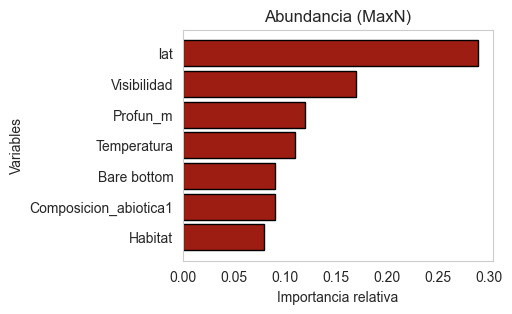

In [225]:
# Extracting keys and values
Variables = list(sorted_feature.keys())
Relative_imp = list(sorted_feature.values())

# Creating a horizontal bar plot
plt.figure(figsize=(4,3))
plt.barh(Variables,Relative_imp, height=0.85, color="#9D1D12", edgecolor="black")
plt.xlabel('Importancia relativa')
plt.ylabel('Variables')
plt.title('Abundancia (MaxN)')
plt.grid(False)

plt.savefig('RF_Ab.tiff', dpi=300, bbox_inches='tight')